# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [3]:
data= pd.read_csv('house_prices.csv')

In [4]:
data

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,FullBath,BedroomAbvGr,LotArea,SalePrice
0,1,7,1560,0,1658,1969,2,1,8059,177106
1,2,4,2827,2,1319,2012,3,4,13530,301044
2,3,8,3920,0,841,2010,1,4,9010,360609
3,4,5,3044,0,1058,1998,0,4,13207,240556
4,5,7,801,1,2428,2020,0,1,9117,193656
...,...,...,...,...,...,...,...,...,...,...
295,296,1,3495,1,1792,1954,2,5,4978,250604
296,297,5,3438,3,1266,2003,0,1,9373,329906
297,298,6,1992,0,1148,1996,1,1,7907,184623
298,299,3,3722,1,1407,1998,1,1,8097,303345


# Basic Checks

In [5]:
data.head()

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,FullBath,BedroomAbvGr,LotArea,SalePrice
0,1,7,1560,0,1658,1969,2,1,8059,177106
1,2,4,2827,2,1319,2012,3,4,13530,301044
2,3,8,3920,0,841,2010,1,4,9010,360609
3,4,5,3044,0,1058,1998,0,4,13207,240556
4,5,7,801,1,2428,2020,0,1,9117,193656


In [6]:
data.tail()

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,FullBath,BedroomAbvGr,LotArea,SalePrice
295,296,1,3495,1,1792,1954,2,5,4978,250604
296,297,5,3438,3,1266,2003,0,1,9373,329906
297,298,6,1992,0,1148,1996,1,1,7907,184623
298,299,3,3722,1,1407,1998,1,1,8097,303345
299,300,9,1667,0,988,1958,2,1,14553,204982


In [7]:
# Quick summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id            300 non-null    int64
 1   OverallQual   300 non-null    int64
 2   GrLivArea     300 non-null    int64
 3   GarageCars    300 non-null    int64
 4   TotalBsmtSF   300 non-null    int64
 5   YearBuilt     300 non-null    int64
 6   FullBath      300 non-null    int64
 7   BedroomAbvGr  300 non-null    int64
 8   LotArea       300 non-null    int64
 9   SalePrice     300 non-null    int64
dtypes: int64(10)
memory usage: 23.6 KB


In [8]:
# Statistical information of the dataset
data.describe()

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,FullBath,BedroomAbvGr,LotArea,SalePrice
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,5.326667,2307.386667,1.330000,1468.796667,1986.163333,1.523333,2.926667,8969.453333,252262.903333
std,86.746758,2.873001,1042.561303,1.109898,672.333705,21.377089,1.131543,1.456604,3753.531132,74998.055214
min,1.000000,1.000000,504.000000,0.000000,303.000000,1950.000000,0.000000,1.000000,2009.000000,82494.000000
25%,75.750000,3.000000,1392.250000,0.000000,903.000000,1967.000000,0.000000,2.000000,5996.250000,190355.250000
50%,150.500000,5.000000,2265.500000,1.000000,1502.000000,1986.000000,2.000000,3.000000,9031.000000,251292.500000
75%,225.250000,8.000000,3306.500000,2.000000,2129.500000,2004.250000,3.000000,4.000000,12316.000000,307105.000000
max,300.000000,10.000000,3998.000000,3.000000,2492.000000,2023.000000,3.000000,5.000000,14987.000000,435291.000000


 Removing the 'ID' column as it is a unique identifier and not useful for model training

In [9]:
data= data.drop('Id', axis=1)

In [10]:
data.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,FullBath,BedroomAbvGr,LotArea,SalePrice
0,7,1560,0,1658,1969,2,1,8059,177106
1,4,2827,2,1319,2012,3,4,13530,301044
2,8,3920,0,841,2010,1,4,9010,360609
3,5,3044,0,1058,1998,0,4,13207,240556
4,7,801,1,2428,2020,0,1,9117,193656


# EDA Coverage

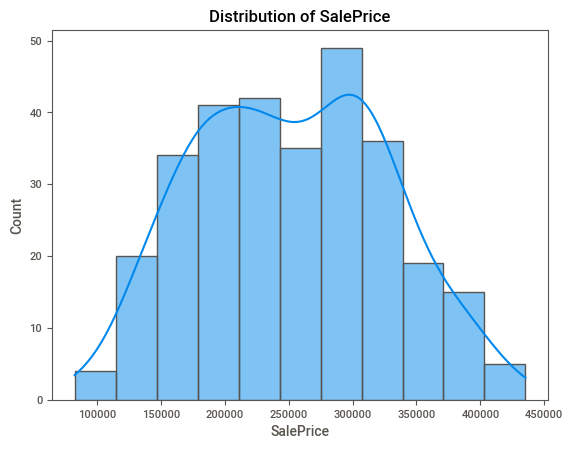

In [16]:
#Univariate 
plt.figure()
sns.histplot(data['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.show()


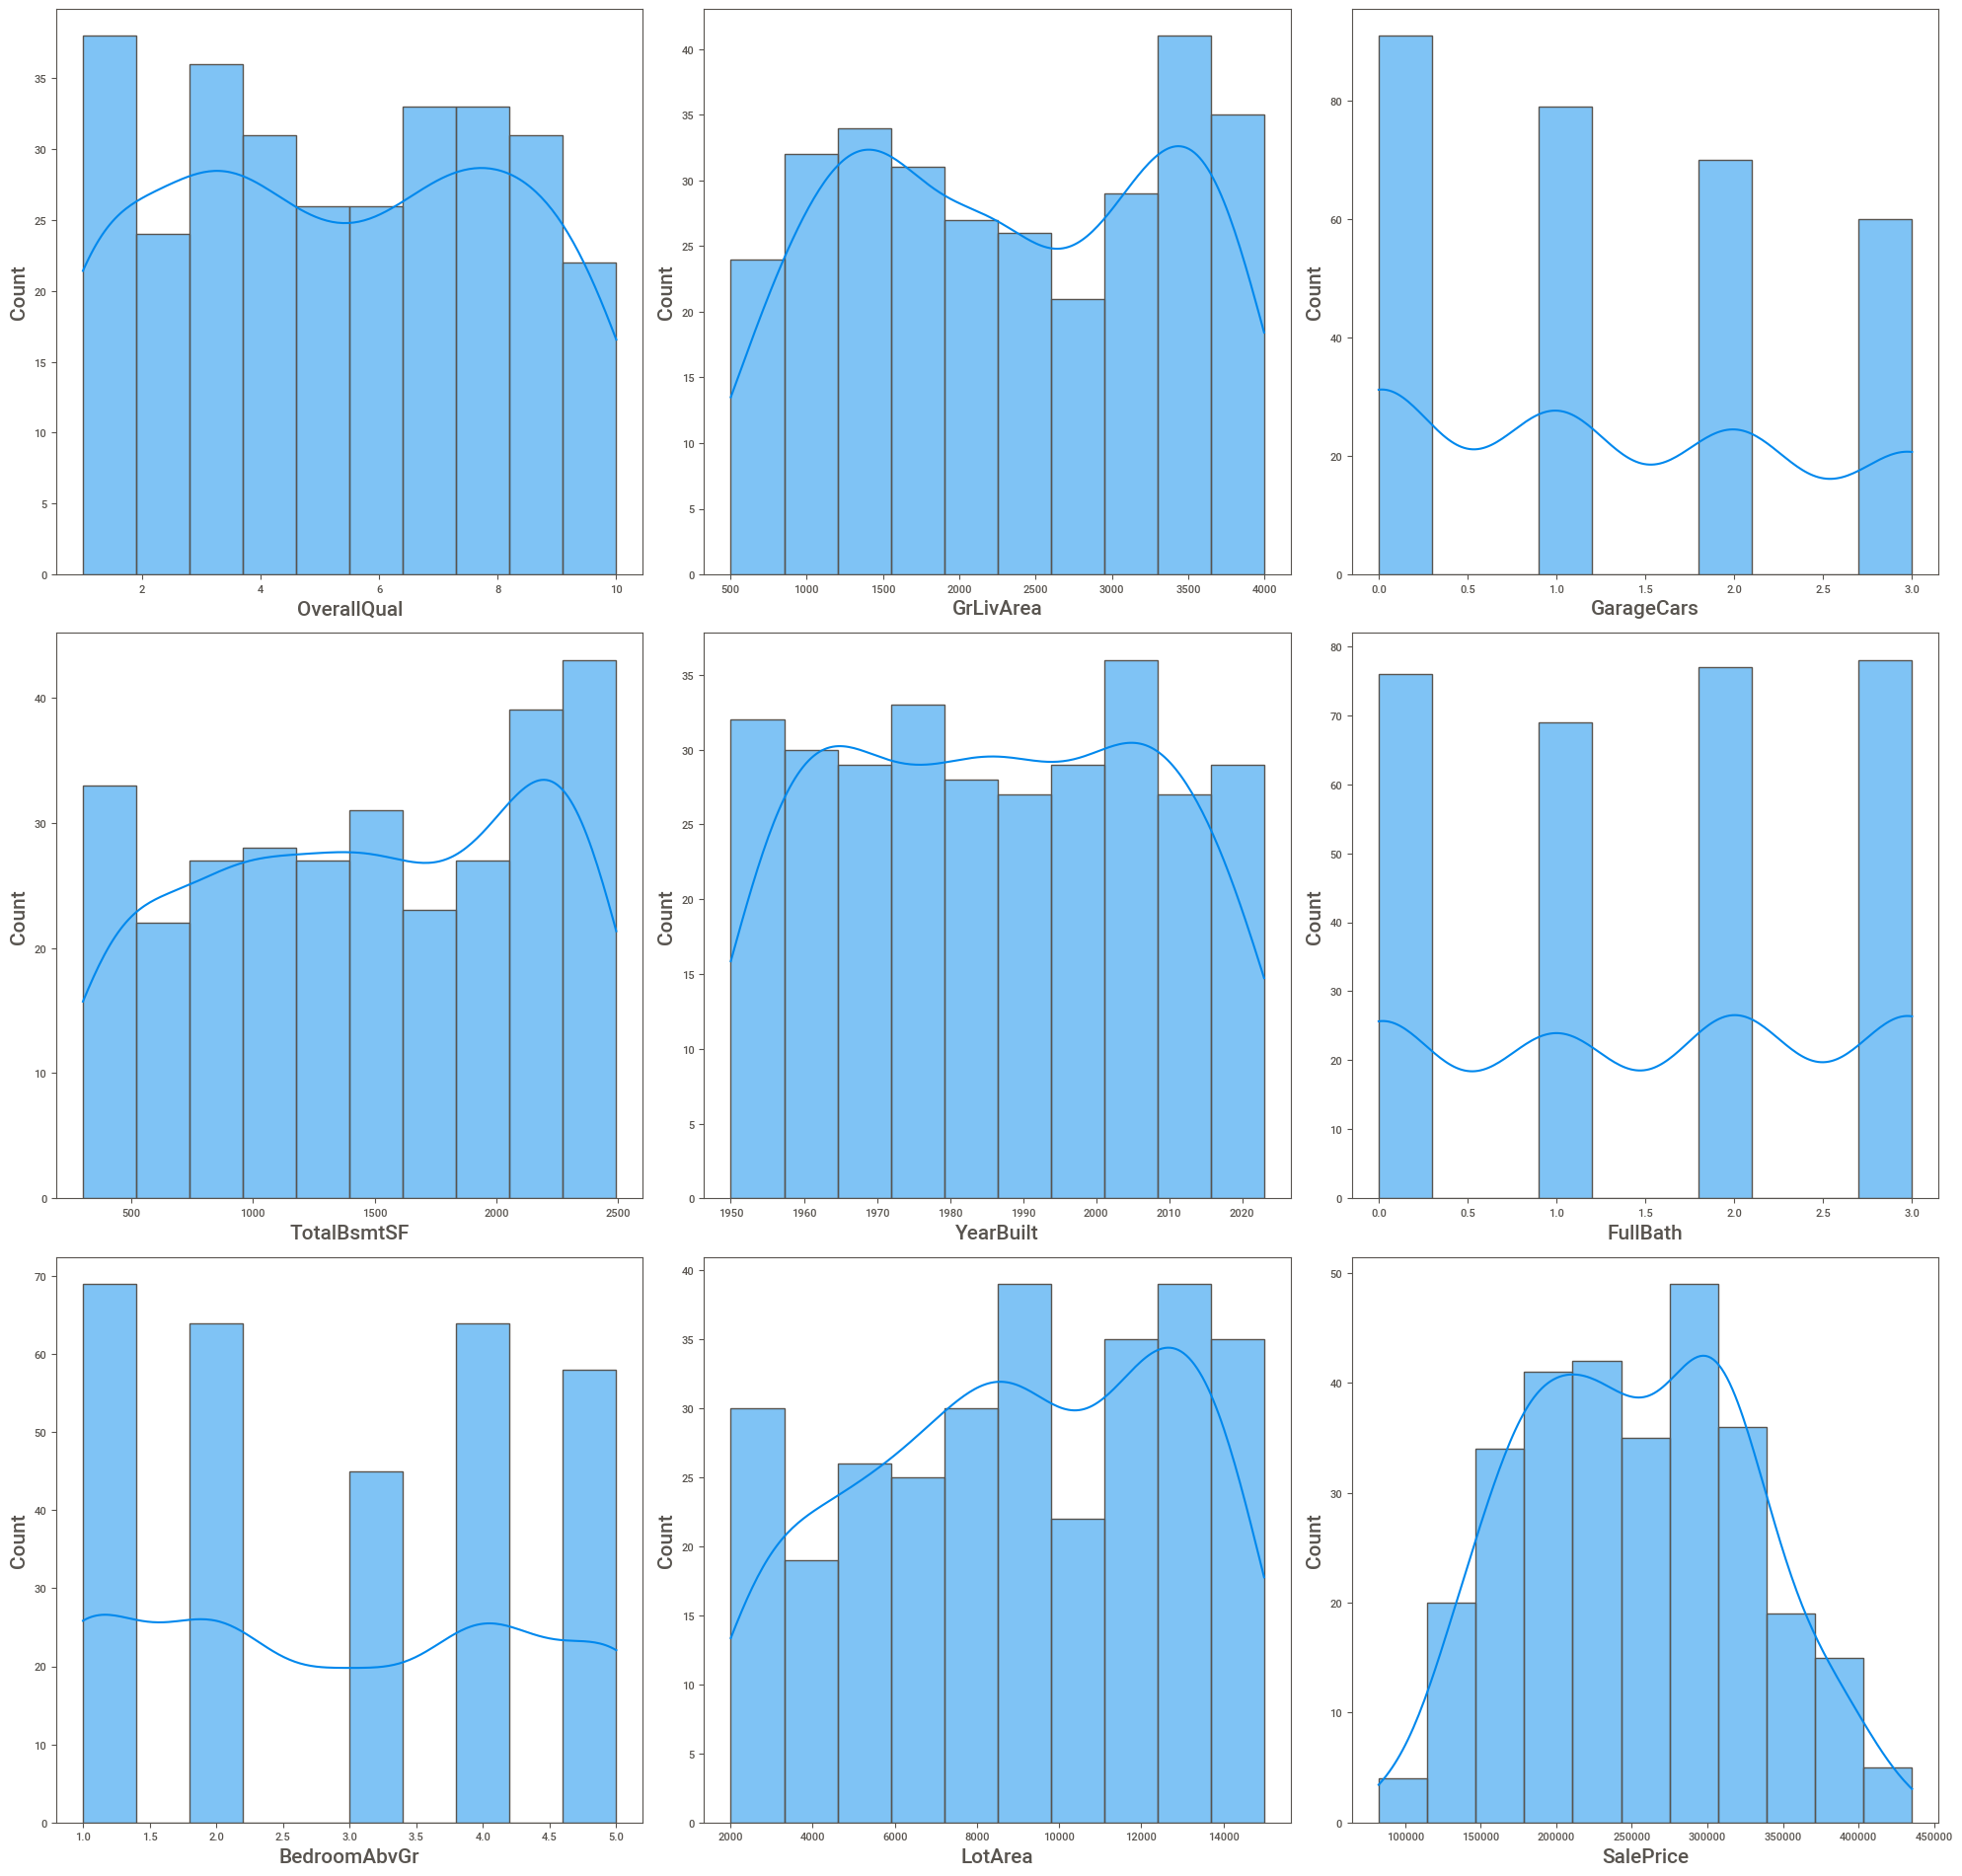

In [26]:
# Univariate Analysis - Histplot of all features
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for column in data.columns:
    if plotnumber <= len(data.columns):
        ax = plt.subplot(4, 3, plotnumber)
        sns.histplot(data[column], kde=True)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plotnumber += 1

plt.tight_layout()
plt.show()


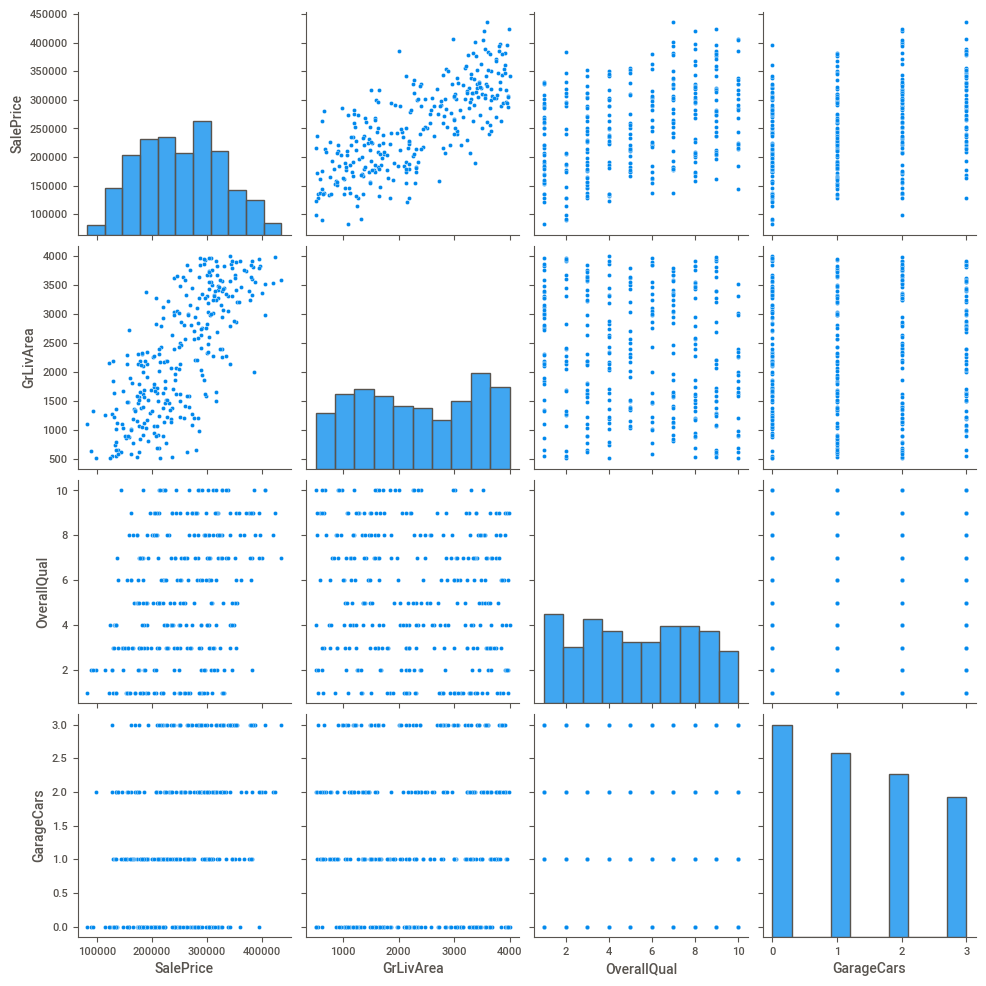

In [31]:
# Multivariate Analysis
sns.pairplot(data[['SalePrice', 'GrLivArea', 'OverallQual', 'GarageCars']])
plt.show()


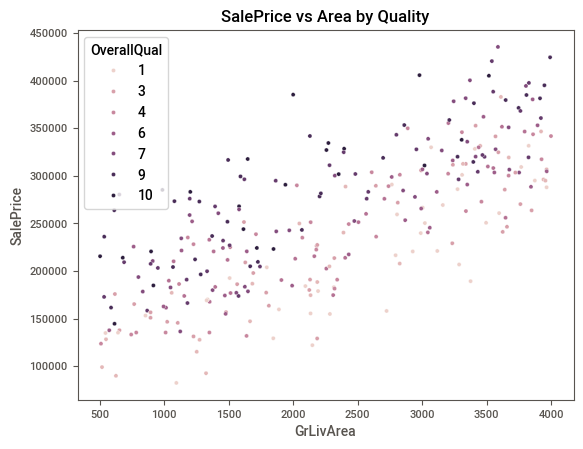

In [32]:
#Shows interaction between features
plt.figure()
sns.scatterplot(
    x='GrLivArea',
    y='SalePrice',
    hue='OverallQual',
    data=data
)
plt.title("SalePrice vs Area by Quality")
plt.show()

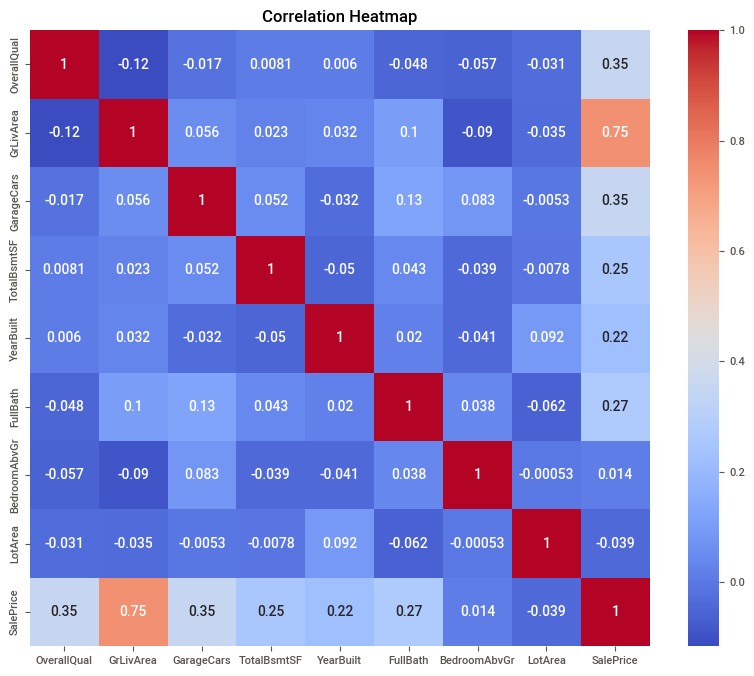

In [33]:
corr = data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Data Preprocesssing

In [58]:
data.isnull().sum()


OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
YearBuilt       0
FullBath        0
BedroomAbvGr    0
LotArea         0
SalePrice       0
dtype: int64

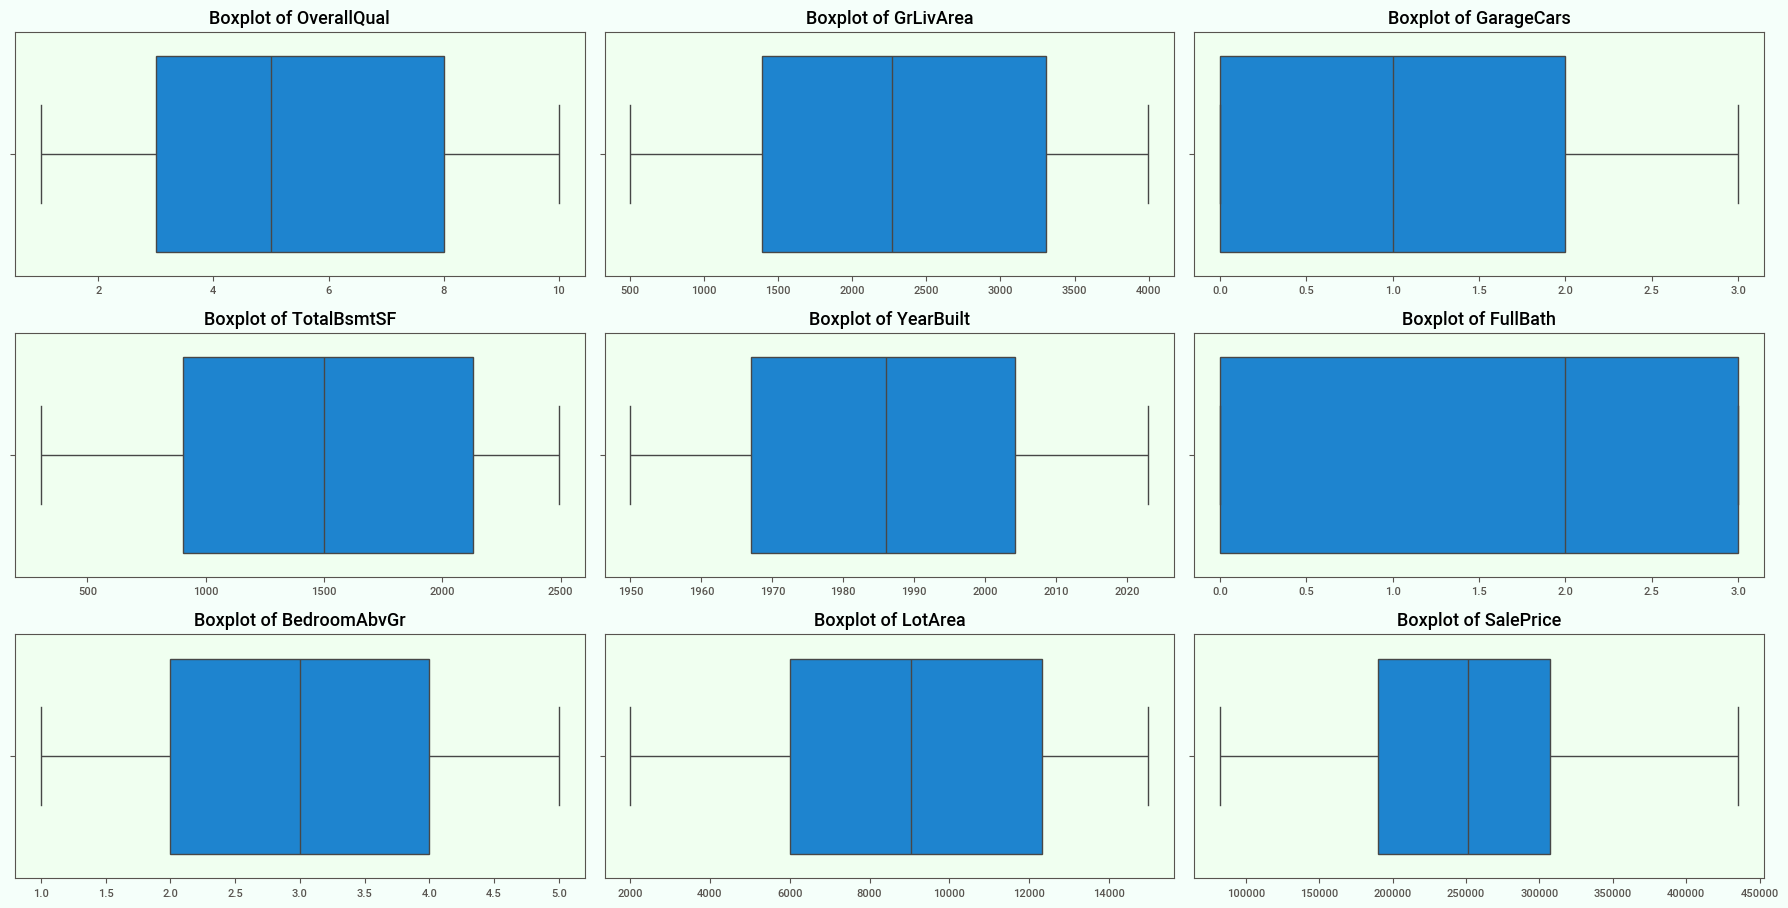

In [38]:
# Set figure size and background color
plt.figure(figsize=(18, 12), facecolor='mintcream')
plotnumber = 1

# Select only numerical columns
num_cols = data.select_dtypes(include='number').columns
total_plots = len(num_cols)

# Define grid size dynamically
rows = (total_plots // 3) + 1

for column in num_cols:
    ax = plt.subplot(rows, 3, plotnumber)
    ax.set_facecolor('honeydew')
    
    sns.boxplot(x=data[column], ax=ax)
    ax.set_title(f'Boxplot of {column}', fontsize=13)
    ax.set_xlabel('')
    
    plotnumber += 1

plt.tight_layout()
plt.show()


In [39]:
#no significant outliers were present

# Feature–Target Split

In [40]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']


# Train–Test Split

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Random Forest Regression Model

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Hyper Parameter Tuning

In [59]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

search = RandomizedSearchCV(
    rf, params, n_iter=20, cv=5, scoring='r2', n_jobs=-1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_


In [60]:
y_pred = best_model.predict(X_test)

# Model Evaluation

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2: 0.8734579543451478
MAE: 20443.984018949363
RMSE: 26795.001838179265


In [65]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print("CV R2 Mean:", cv_scores.mean())


CV R2 Mean: 0.8704900039079295


# Predict Price for a New House

In [51]:
new_house_df = pd.DataFrame([{
    'OverallQual': 7,
    'GrLivArea': 1800,
    'GarageCars': 2,
    'TotalBsmtSF': 900,
    'YearBuilt': 2010,
    'FullBath': 2,
    'BedroomAbvGr': 3,
    'LotArea': 8000
}])


In [69]:
predicted_price = best_model.predict(new_house_df)
print("Predicted House Price:", predicted_price[0])


Predicted House Price: 250743.72853117716


In [70]:
#Feature Importance 
importances = best_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

importance_df


,Feature,Importance
1,GrLivArea,0.633340
0,OverallQual,0.150019
2,GarageCars,0.064334
4,YearBuilt,0.053007
3,TotalBsmtSF,0.049025
7,LotArea,0.020285
5,FullBath,0.019103
6,BedroomAbvGr,0.010887


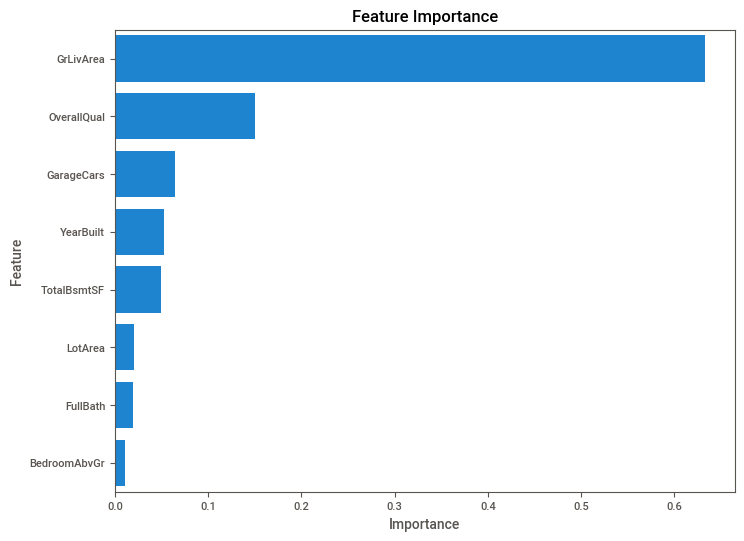

In [71]:
# Feature Importance plot
plt.figure(figsize=(8,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df
)
plt.title("Feature Importance")
plt.show()


In [66]:
import joblib
joblib.dump(best_model, "house_price_model.pkl")


['house_price_model.pkl']